In [118]:
# 產生資料
import numpy as np #科學運算
import matplotlib.pyplot as plt #繪圖工具
from matplotlib.colors import ListedColormap #上色工具
from sklearn import neighbors, datasets

from sklearn.datasets.samples_generator import make_classification #X為樣本特徵,y
X, y = make_classification(n_samples = 2, n_features = 5, n_clusters_per_class=3, n_informative=4, n_redundant = 0, n_classes = 2) # n_classes為類別, n_informative為資訊量; n_informative, n_redundant, n_repeated總和要小於n_feature

In [119]:
X #顯示出隨機產生的座標


array([[ 1.25484092,  1.01355822, -1.13663589, -1.73244009,  0.38624487],
       [ 0.71277811, -1.95265468, -0.71007622,  0.31031893, -2.2518505 ]])

In [120]:
y #兩點各代表一個類別,第一類用"0"表示,第二類用"1"表示

array([0, 1])

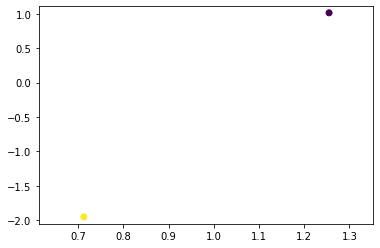

In [121]:
# 使用KNN分類
clf = neighbors.KNeighborsClassifier(n_neighbors = 1) #建立模型設定K值是基數 因為KNN採多數決 基數較好分類
clf.fit(X, y) #用KNN來擬合模型,我們選擇K=1，權重為距離遠近
h = 0.02 #網路中的步長 確認訓練集的邊界 生成隨機數據來做測試集, 然後做預測
x_min, x_max = X[:, 0].min()-0.1 ,X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1 ,X[:, 1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #建立取樣點

plt.scatter(X[:,0], X[:,1], marker='o', c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show() #根據隨機生成樣本不同，圖形也不同

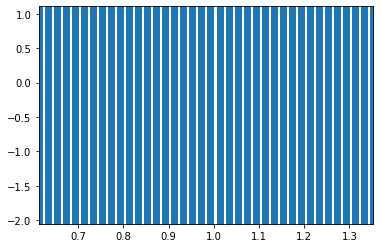

In [122]:
plt.scatter(xx[:], yy[:], marker = 'o')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show() #根據隨機生成樣本不同，圖形也不同